# Sequential Backward Selection (SBS)

In [ ]:
"""
The author states, that SBS algorithm is not yet implemented in scikit-learn,
but there is a similar algorithm, see
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
"""

## Let's check how the SBS algorithm performs on kNN classifier and Wine dataset

In [3]:
# getting the data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Phenolic content',
                  'Flavonoids', 'Non-flavonoid phenols', 'Proanthocyanidins', 'Color intensity', 'Shade',
                   'Transmittancy 280/315 nm', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

stds = StandardScaler()
X_train_std = stds.fit_transform(X_train)
X_test_std = stds.transform(X_test)

In [6]:
# creating model and reducing the dimensionality with SBS
from sklearn.neighbors import KNeighborsClassifier
from sbs import SBS
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

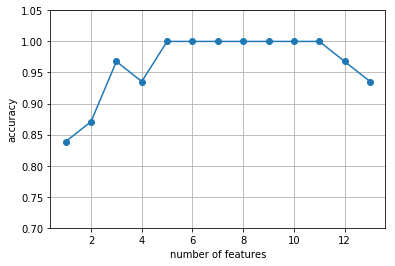

In [15]:
# visualization of the process
import matplotlib.pyplot as plt
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.05])
plt.ylabel('accuracy')
plt.xlabel('number of features')
plt.grid()
plt.show()

In [25]:
i = [len(s) for s in sbs.subsets_].index(5)
sub_i = sbs.subsets_[i]
print(list(df_wine.columns[1:][list(sub_i)]))

['Alcohol', 'Malic acid', 'Alkalinity of ash', 'Shade', 'Proline']


# Let's check the accuracy of the model, trained on whole training set, on the original test set

## First, let's input all features:

In [26]:
knn.fit(X_train_std, y_train)
print("Accuracy for training set:", knn.score(X_train_std, y_train))
print("Accuracy for test set:", knn.score(X_test_std, y_test))

Accuracy for training set: 0.9838709677419355
Accuracy for test set: 0.9444444444444444


## Now let's do the same thing but only for the previously determined 5-elements subset of features:

In [27]:
knn.fit(X_train_std[:, sub_i], y_train)
print("Accuracy for training set:", knn.score(X_train_std[:, sub_i], y_train))
print("Accuracy for test set:", knn.score(X_test_std[:, sub_i], y_test))

Accuracy for training set: 0.9596774193548387
Accuracy for test set: 0.9629629629629629


## Conclusions:
Few pros of the approach:
- Less computational resources required (over 60% reduction in terms of X matrix);
- We actually improved the accuracy for the test set, which is pretty much the goal of all improvements in the data/model preparation;
- We reduced the overfitting phenomenon - the difference between accuracy on training set and test set decreased.